<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-01 05:30:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  52.5MB/s    in 3.8s    

2025-08-01 05:30:35 (53.5 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


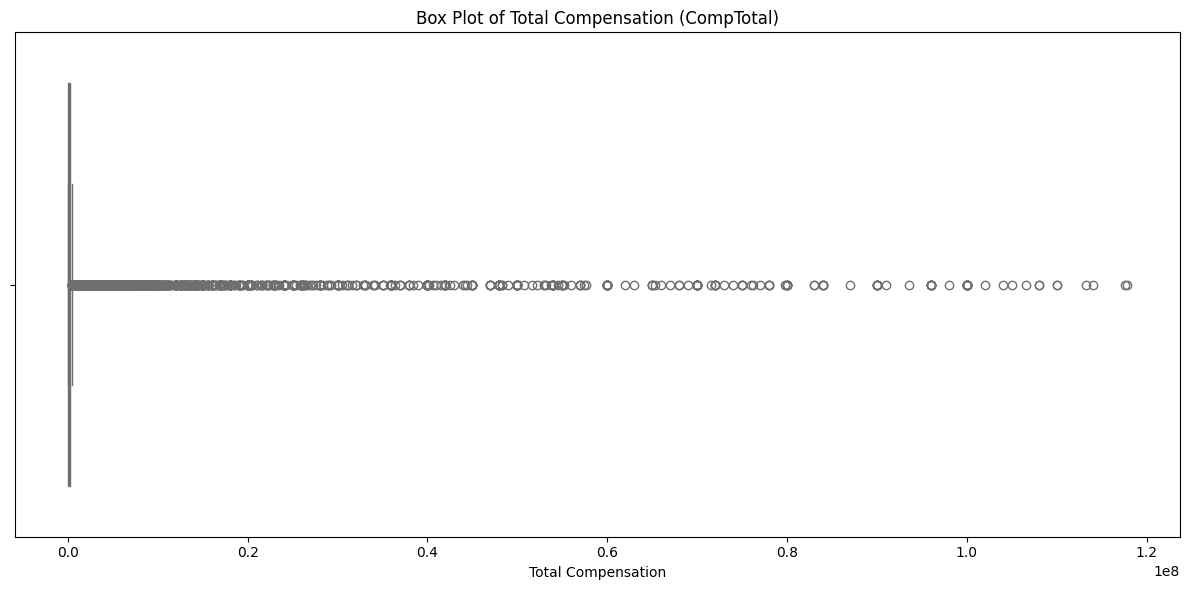

In [8]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('survey-data.csv')

# 2. Convert CompTotal to numeric and remove invalid/missing entries
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df_filtered = df[df['CompTotal'].notnull() & (df['CompTotal'] > 0)]

# 3. Optional: Filter extreme values (optional, to reduce skew)
df_filtered = df_filtered[df_filtered['CompTotal'] < df_filtered['CompTotal'].quantile(0.99)]

# 4. Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered['CompTotal'], color='skyblue')
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.tight_layout()
plt.show()



**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


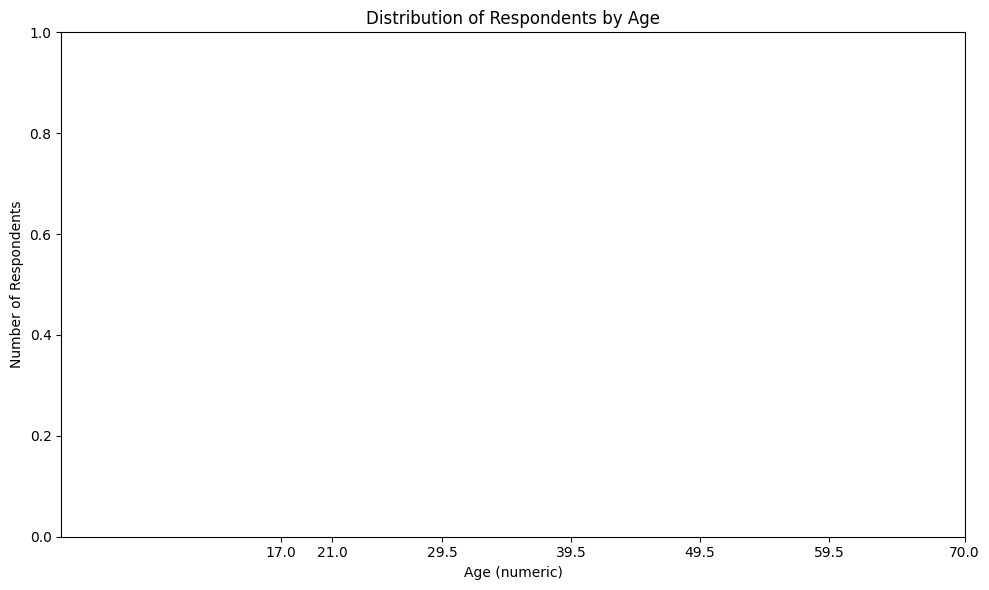

In [9]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('survey-data.csv')

# 2. Drop missing Age values
df = df[['Age']].dropna()

# 3. Map Age ranges to numeric midpoints
age_map = {
    'Under 18': 17,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_map)

# 4. Drop any unmapped values
df = df.dropna(subset=['AgeNumeric'])

# 5. Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['AgeNumeric'], bins=7, kde=True, color='steelblue')
plt.title('Distribution of Respondents by Age')
plt.xlabel('Age (numeric)')
plt.ylabel('Number of Respondents')
plt.xticks(sorted(age_map.values()))
plt.tight_layout()
plt.show()



### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


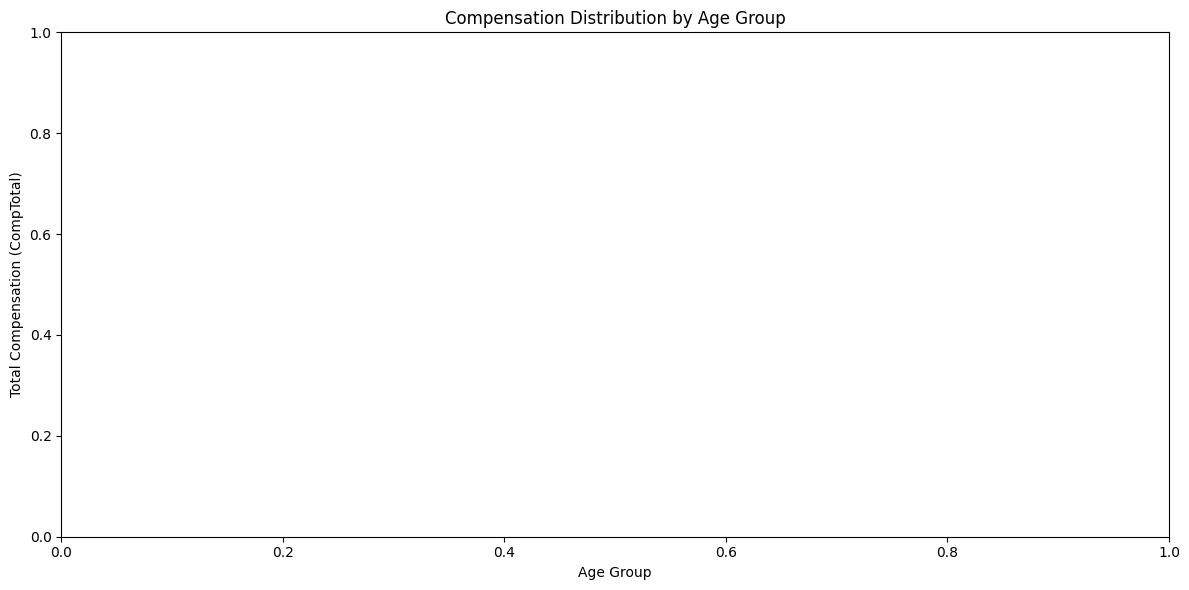

In [10]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('survey-data.csv')

# 2. Clean and convert relevant columns
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df[df['CompTotal'].notnull() & (df['CompTotal'] > 0)]

# 3. Optional: Filter out extreme outliers (top 1%) to improve readability
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]

# 4. Ensure Age is categorized properly
valid_age_order = [
    'Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or older'
]
df = df[df['Age'].isin(valid_age_order)]
df['Age'] = pd.Categorical(df['Age'], categories=valid_age_order, ordered=True)

# 5. Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='CompTotal', data=df, palette='pastel')
plt.title('Compensation Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (CompTotal)')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_1619/1130015112.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df, palette='coolwarm')


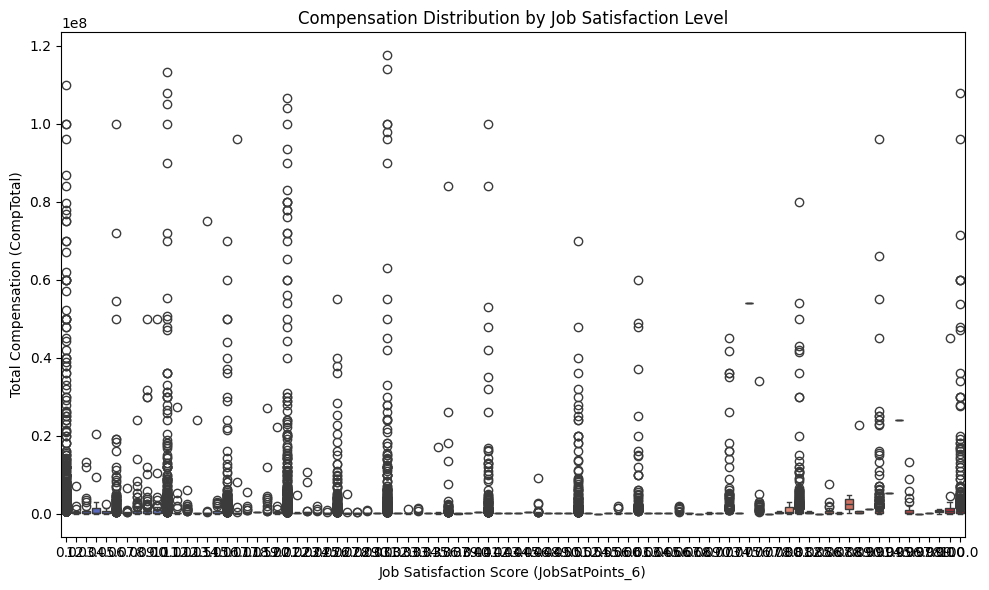

In [11]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('survey-data.csv')

# 2. Convert CompTotal to numeric and clean
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df[df['CompTotal'].notnull() & (df['CompTotal'] > 0)]

# 3. Optional: Remove top 1% outliers for readability
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]

# 4. Drop rows with missing job satisfaction data
df = df[df['JobSatPoints_6'].notnull()]

# 5. Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df, palette='coolwarm')
plt.title('Compensation Distribution by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Score (JobSatPoints_6)')
plt.ylabel('Total Compensation (CompTotal)')
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_1619/1766159625.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top_roles, palette='Set3')


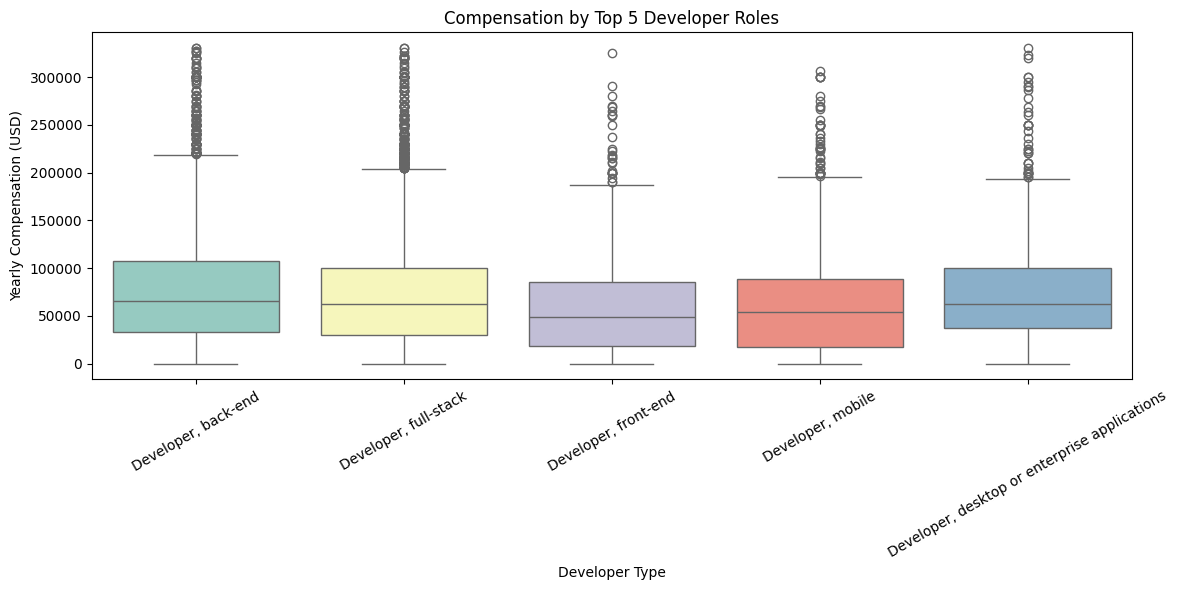

In [13]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('survey-data.csv')

# 2. Clean the compensation column
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df[df['ConvertedCompYearly'].notnull() & (df['ConvertedCompYearly'] > 0)]

# 3. Expand multiple roles in DevType column
df = df[df['DevType'].notnull()]
df_roles = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')

# 4. Identify top 5 developer roles
top_5_roles = df_roles['DevType'].value_counts().head(5).index.tolist()

# 5. Filter dataset to include only top 5 roles
df_top_roles = df_roles[df_roles['DevType'].isin(top_5_roles)]

# 6. Optional: Remove top 1% outliers
df_top_roles = df_top_roles[df_top_roles['ConvertedCompYearly'] < df_top_roles['ConvertedCompYearly'].quantile(0.99)]

# 7. Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top_roles, palette='Set3')
plt.title('Compensation by Top 5 Developer Roles')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_1619/2353150143.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='CompTotal', data=df_top_countries, palette='viridis')


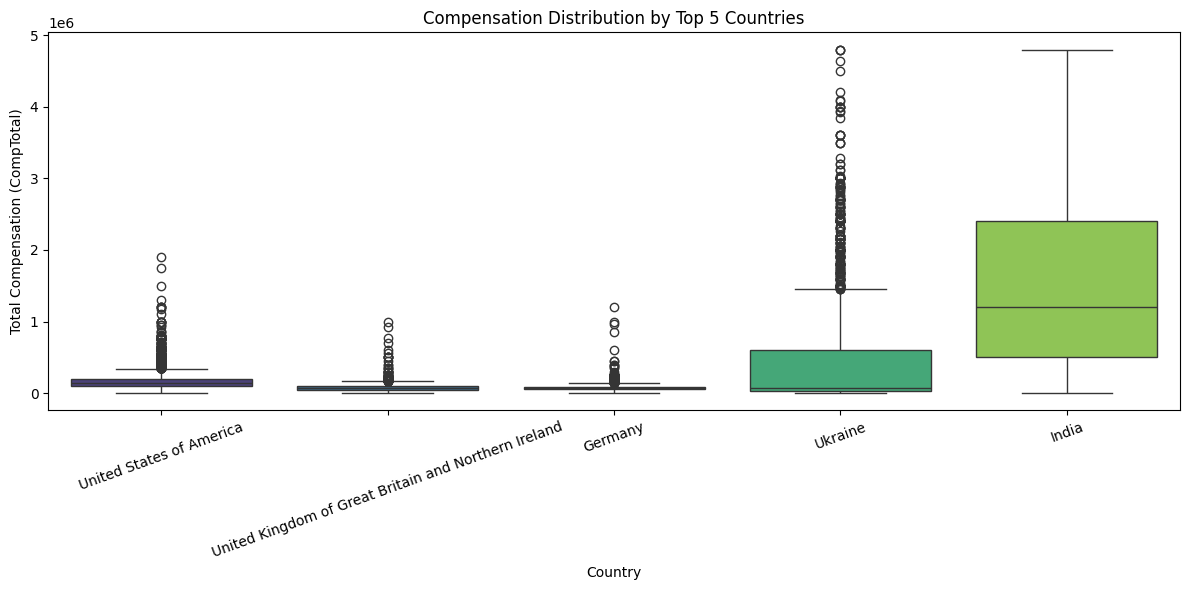

In [14]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('survey-data.csv')

# 2. Clean CompTotal column
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df[df['CompTotal'].notnull() & (df['CompTotal'] > 0)]

# 3. Clean and filter Country column
df = df[df['Country'].notnull()]

# 4. Get top 5 countries by number of respondents
top_countries = df['Country'].value_counts().head(5).index.tolist()

# 5. Filter data for only those countries
df_top_countries = df[df['Country'].isin(top_countries)]

# 6. Optional: Remove top 1% outliers for readability
df_top_countries = df_top_countries[df_top_countries['CompTotal'] < df_top_countries['CompTotal'].quantile(0.99)]

# 7. Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='CompTotal', data=df_top_countries, palette='viridis')
plt.title('Compensation Distribution by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation (CompTotal)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_1619/1982014185.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Employment', y='CompTotal', data=df_filtered, palette='pastel')
/tmp/ipykernel_1619/1982014185.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


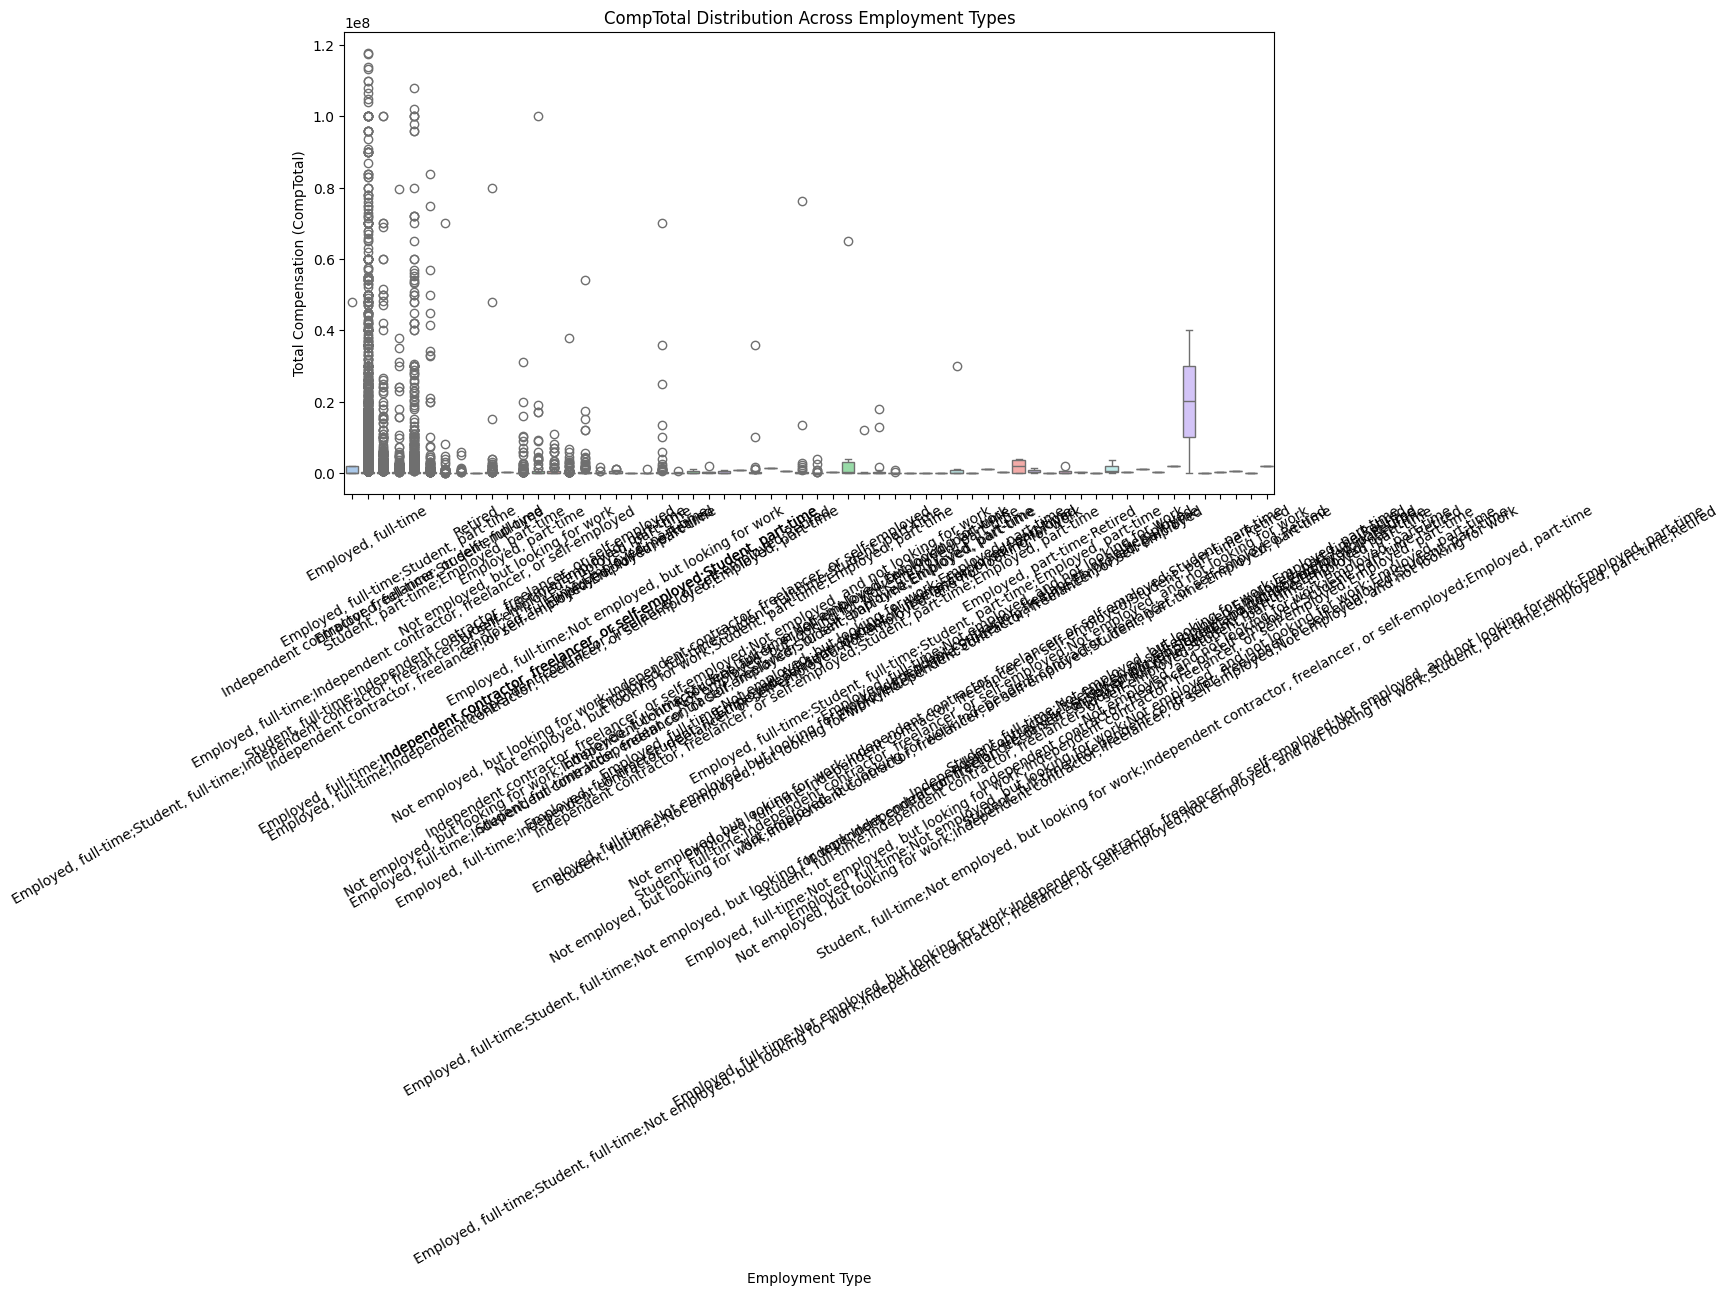

In [15]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('survey-data.csv')

# 2. Clean CompTotal
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df[df['CompTotal'].notnull() & (df['CompTotal'] > 0)]

# 3. Clean Employment column
df = df[df['Employment'].notnull()]

# 4. Optional: Remove top 1% of outliers for better visualization
df_filtered = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]

# 5. Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employment', y='CompTotal', data=df_filtered, palette='pastel')
plt.title('CompTotal Distribution Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (CompTotal)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_1619/2910471040.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df_filtered, palette='Set3')


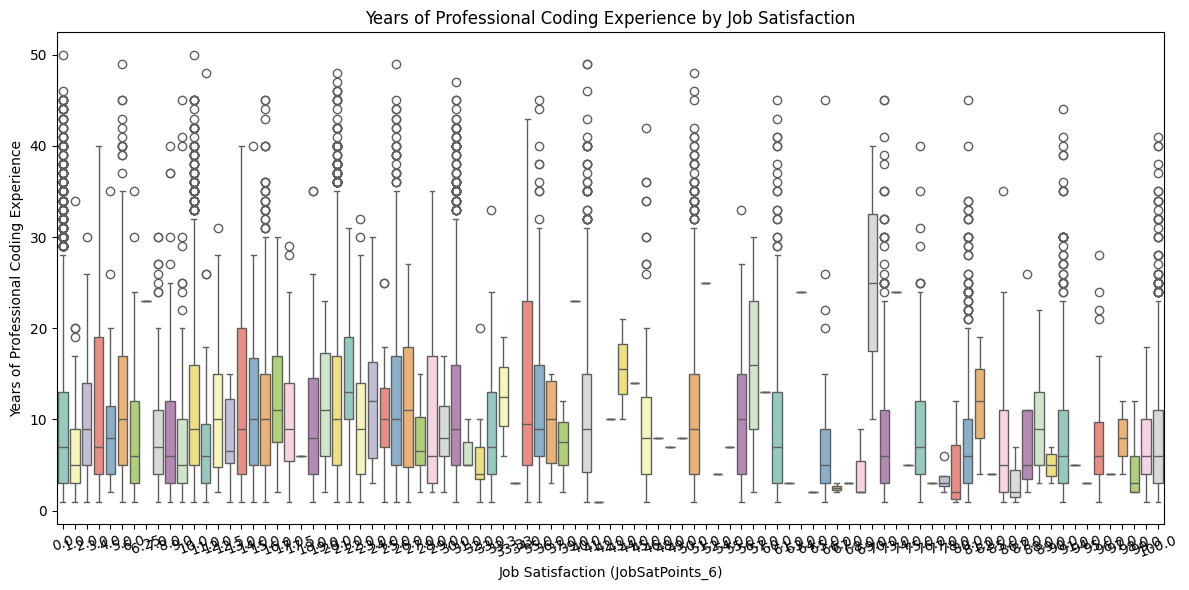

In [16]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('survey-data.csv')

# 2. Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 3. Filter missing or invalid values
df_filtered = df[df['YearsCodePro'].notnull() & df['JobSatPoints_6'].notnull()]

# 4. Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df_filtered, palette='Set3')
plt.title('Years of Professional Coding Experience by Job Satisfaction')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [17]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
